# The Hodgkin-Huxley model


The **Hodgkin-Huxley model** is a mathematical model that describes how action potentials in neurons are initiated and propagated.

## Basic components

The typical Hodgkin-Huxley model treats each component of an excitable cell as an electrical element (as shown in the figure below)

![inline 30%](https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Hodgkin-Huxley.svg/350px-Hodgkin-Huxley.svg.png)

* $C_m$ is the passive membrane capacitance
* $g_n$ are the active voltage-gated ion channels represented by electrical conductances (where $n$ is the specific ion channel) that depend on both voltage and time
* $g_L$ is the passive leak channel represented by a linear conductance
* $E_n$ are the gradients driving the flow of ions (determined by intra- and extracellular concentrations of ions)
* $I_p$ are the ion pumps represented by current sources 

## The model

The total current can be modeled via the following (ordinary) differential equations

$$C_m \frac{dV_m}{dt} = I_{inj} - \bar{g}_K n^4 (V_m - E_K) - \bar{g}_{Na} m^3 h (V_m - E_{Na}) - \bar{g}_L (V_m - E_L)$$

$$\frac{dn}{dt} = \alpha_n (1 - n) - \beta_n n$$

$$\frac{dm}{dt} = \alpha_m (1 - m) - \beta_m m$$

$$\frac{dh}{dt} = \alpha_h (1 - h) - \beta_h h$$

* $I_{inj}$ is the injected current
* $\bar{g}_n$ are the maximum conductances for a given channel (sodium $Na$, potassium $K$, and leak $L$)
* $E_n$ are the reversal potentials for a given channel
* $n$, $m$, and $h$ are the gating variables

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
from __future__ import print_function
%matplotlib inline

# enable LaTeX in plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14)

## Voltage-dependent rate variables

$\alpha$ and $\beta$ are the voltage-dependent rates at which the activation and inactivation gates are opening or closing, respectively.

Sodium ($Na$) has an activation and an inactivation gate variable. Potassium (K) only has an activation gate variable.

In [33]:
def alpha_n(V_m):
    """Voltage-dependent rate at which the potassium (K) activation gate is opening"""
    return (0.01 * (-V_m + 10)) / (np.exp((-V_m + 10) / 10) - 1)

def beta_n(V_m):
    """Voltage-dependent rate at which the potassium (K) activation gate is closing"""
    return 0.125 * np.exp(-V_m / 80)

def alpha_m(V_m):
    """Voltage-dependent rate at which the sodium (Na) activation gate is opening"""
    return (0.1 * (-V_m + 25)) / (np.exp((-V_m + 25) / 10) - 1 )

def beta_m(V_m):
    """Voltage-dependent rate at which the sodium (Na) activation gate is closing"""
    return 4 * np.exp(-V_m / 18)

def alpha_h(V_m):
    """Voltage-dependent rate at which the sodium (Na) inactivation gate is opening"""
    return 0.07 * np.exp(-V_m / 20)

def beta_h(V_m):
    """Voltage-dependent rate at which the sodium (Na) inactivation gate is closing"""
    return 1 / (np.exp((-V_m + 30) / 10) + 1)

## Visualization of voltage-dependent rate variables

* $n_\infty(V_m) = \frac{\alpha_n(V_m)}{\alpha_n(V_m) + \beta_n(V_m)} $
* $m_\infty(V_m) = \frac{\alpha_m(V_m)}{\alpha_m(V_m) + \beta_m(V_m)} $
* $h_\infty(V_m) = \frac{\alpha_h(V_m)}{\alpha_h(V_m) + \beta_h(V_m)} $

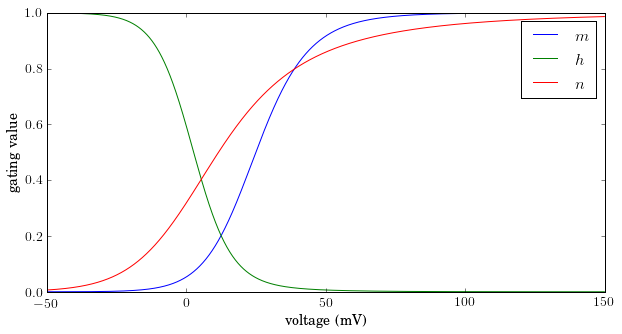

In [34]:
def n_inf(V_m):
    return alpha_n(V_m) / (alpha_n(V_m) + beta_n(V_m))

def m_inf(V_m):
    return alpha_m(V_m) / (alpha_m(V_m) + beta_m(V_m))

def h_inf(V_m):
    return alpha_h(V_m) / (alpha_h(V_m) + beta_h(V_m))

voltage = np.arange(-50, 150, 0.1)
plt.figure(figsize=(10, 5))
plt.plot(voltage, map(m_inf, voltage), label=r'$m$')
plt.plot(voltage, map(h_inf, voltage), label=r'$h$')
plt.plot(voltage, map(n_inf, voltage), label=r'$n$')
plt.xlabel(r'voltage (mV)')
plt.ylabel(r'gating value')
plt.legend()
plt.show()

## Constants

$\bar{g}_{Na}$, $\bar{g}_{K}$, and $\bar{g}_{L}$ are the maximum conductances for sodium ($Na^+$), potassium ($K^+$), and the leak channel ($L$), respectively.

$E_{Na}$, $E_{K}$, and $E_{L}$ are the respective Nernst reveral potentials

$C_m$ is the membrane capacitance

In [4]:
# maximum conductances
g_Na = 120
g_K = 36
g_L = 0.3

# reversal potentials
E_Na = 115
E_K = -12
E_L = 10.6

# membrane capacitance
C_m = 1

## Currents

The currents flowing through the respective ion channels are modeled as follows

$$I_{Na} = \bar{g}_{Na} m^3 h (V_m - E_{Na})$$

$$I_{K} = \bar{g}_{K} n^4 (V_m - E_{K})$$

$$I_{L} = \bar{g}_{L} (V_m - E_{L})$$

In [5]:
def I_Na(V_m, m, h):
    """Current flowing through the sodium (Na) channels"""
    return g_Na * (m ** 3) * h * (V_m - E_Na)

def I_K(V_m, n):
    """Current flowing through the potassium (K) channels"""
    return g_K * (n ** 4) * (V_m - E_K)

def I_L(V_m):
    """Current flowing through the leak (L) channels"""
    return g_L * (V_m - E_L)

## Putting it all together

The entire model can be expressed as follows

$$\frac{dV_m}{dt} = \frac{1}{C_m} (I_{inj} - \bar{g}_K n^4 (V_m - E_K) - \bar{g}_{Na} m^3 h (V_m - E_{Na}) - \bar{g}_L (V_m - E_L))$$

$$\frac{dn}{dt} = \alpha_n (1 - n) - \beta_n n$$

$$\frac{dm}{dt} = \alpha_m (1 - m) - \beta_m m$$

$$\frac{dh}{dt} = \alpha_h (1 - h) - \beta_h h$$

In [6]:
def dVdt(V_m, m, h, n, I_inj):
    return (1. / C_m) * (I_inj - I_Na(V_m, m, h) - I_K(V_m, n) - I_L(V_m))

def dndt(V_m, n):
    return alpha_n(V_m) * (1 - n) - beta_n(V_m) * n

def dmdt(V_m, m):
    return alpha_m(V_m) * (1 - m) - beta_m(V_m) * m

def dhdt(V_m, h):
    return alpha_h(V_m) * (1 - h) - beta_h(V_m) * h

## Define `simulate` function

The simulation is defined by the `simulate(time, I_inj)` function and takes a `time` interval and the injected current `I_inj` over that interval.

The simulation returns the following output over the `time` interval:

1. `V` the membrane voltage
2. `n`, `m`, and `h` the value of the gating variables
3. `ina`, `ik`, and `il` the current flowing through the sodium, potassium and leak channels

In [29]:
def simulate(time, I_inj):
    
    # voltage over time
    V = np.zeros_like(time)

    # gating variables over time
    m = np.zeros_like(time)
    h = np.zeros_like(time)
    n = np.zeros_like(time)

    # currents over time
    ina = np.zeros_like(time)
    ik = np.zeros_like(time)
    il = np.zeros_like(time)

    # set initial values
    V[0] = 0.0 # normally -70 but original HH paper uses 0
    m[0] = m_inf(V[0])
    h[0] = h_inf(V[0])
    n[0] = n_inf(V[0])

    # simulate model
    for t in xrange(len(time) - 1):

        # integrate
        V[t+1] = V[t] + dVdt(V[t], m[t], h[t], n[t], I_inj[t]) * dt
        n[t+1] = n[t] + dndt(V[t], n[t]) * dt
        m[t+1] = m[t] + dmdt(V[t], m[t]) * dt
        h[t+1] = h[t] + dhdt(V[t], h[t]) * dt

        # keep those for plotting current
        ina[t+1] = I_Na(V[t], m[t], h[t])
        ik[t+1] = I_K(V[t], n[t])
        il[t+1] = I_L(V[t])
        
    return V, n, m, h, ina, ik, il

## Define `plot` function

The simulation output can be plotted with the `plot_all(output)` function. For convenience, the `plot_voltage(output)` function only plots the voltage and the injected current over time.

In [53]:
def plot_all(output):
    
    # unpack simulation output
    V, n, m, h, ina, ik, il = output
    
    # plot
    fig, axes = plt.subplots(3, sharex=True)
    fig.set_size_inches(20, 17)
    V_ax, I_ax, G_ax = axes
    V_ax.plot(time, V, label=r'$V_m$', color='blue')
    V_ax.plot(time, I_inj, label=r'$I_{inj}$', color='green')
    V_ax.set_ylim([None, 120])
    V_ax.set_ylabel(r'voltage (mV) / current (uA)')
    V_ax.legend()
    I_ax.plot(time, ina, label=r'$I_{Na}$', color='green')
    I_ax.plot(time, ik, label=r'$I_K$', color='blue')
    I_ax.plot(time, il, label=r'$I_L$', color='red')
    I_ax.set_ylabel(r'current (uA)')
    I_ax.legend()
    G_ax.plot(time, m, label=r'$m$', color='green')
    G_ax.plot(time, h, label=r'$h$', color='blue')
    G_ax.plot(time, n, label=r'$n$', color='red')
    G_ax.set_ylabel(r'gating value')
    G_ax.set_xlabel(r'time (ms)')
    G_ax.legend()
    plt.show()

def plot_voltage(output):

    # unpack only voltage
    V = output[0]
    
    # plot
    plt.figure(figsize=(20, 5))
    plt.plot(time, V, label=r'$V_m$', color='blue')
    plt.plot(time, I_inj, label=r'$I_{inj}$', color='green')
    plt.ylabel(r'voltage (mV) / current (uA)')
    plt.xlabel(r'time (ms)')
    plt.ylim([None, 120])
    plt.legend()
    plt.show()

## Run the simulation

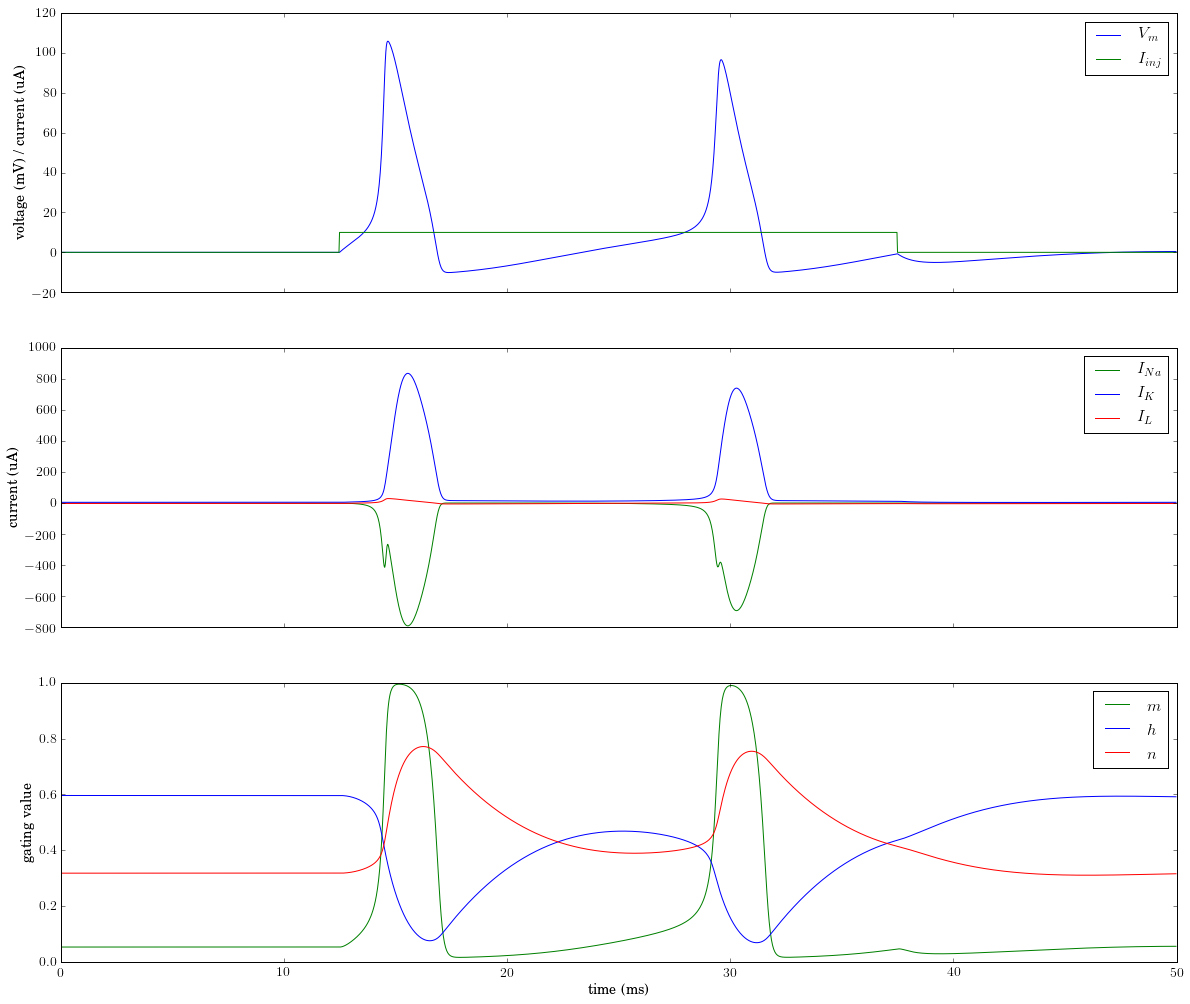

In [61]:
T = 50 # total time (ms) 
dt = 0.025 # time step (ms)
time = np.arange(0, T, dt)

# set injected current
I_inj = np.zeros_like(time)
I_inj[500:1500] = [10] * 1000

# run simulation
output = simulate(time, I_inj)

# plot simulation output
plot_all(output)

## Determination of threshold value

To activate the model membrane we use a current pulse. Investigate how the amplitude and duration affects the response. When does the stimulation amplitude become sufficient to elicit an action potential? This is the threshold value.

Use the parameter values from the table below. *Double click to edit the table!*

Current (nA) | Duration (ms) | Action potential (yes/no)
------------ | ------------- | ------------------------
1            | 0.1           |
2            | 0.1           |
0.8          | 0.1           |
0.7          | 0.1           |

### Questions

1. How is the amplitude of the action potential affected by the stimulation strength? What is this behavior called?
2. Describe what happens to the threshold value!

### Answers
1. ...
2. ...

*Double click to edit your answers!*

## Dependence on the ion concentrations

The ion concentrations of $K^+$ and $Na^+$ are critical for the resting potential and the peak of the action potential. It is also critical for the shape of the action potential. Investigate this by changing the extracellular concentrations according to the following table (the extracellular ion concentrations are easier to control than the internal ones). Observe how the resting and action potential are changed. An increase in $K^+$ can be seen as kidney insufficience. What consequences will this have on the nerve activity?

Change the $K^+$ concentrations. Then change the extracellular concentration to the values below. *Double click to edit the table!*

$K^+$ (mM) | $Na^+$ (mM) | Resting potential (mV) | Action potential (yes/no)
---------- | ----------- | ---------------------- | ------------------------
2.5        | 114.5       |                        |
6          | 114.5       |                        |
15         | 114.5       |                        |

### Questions

3. Why is the resting potential changed by changes in ion concentrations?
4. Why does the changed resting potential not trigger an action potential in the last case?

### Answers

1. ...
2. ...

*Double click to edit your answers!*

## Dependence on permeability

Many pharmacological drugs affect the ion permeabilities. The simplest mechanism is to block the channel. Local anaesthetics and the venom from the pufferfish (tetrodotoxin) affect the $Na$ channels in such a way. Also antiepileptics and antiarythmics have similar action mechanisms. Other toxins inhibit the inactivation of the channels.

Investigate this by changing the $Na$ and $K$ permeabilities according to the table below. For simplicity the normal permeabilities are set to 1. *Double click to edit the table!*


$K$ (relative) | $Na$ (relative) | Peak amplitude (mV)
-------------- | --------------- | ------------------
1              | 1               |
1              | 0.5             |
1              | 0               |
0              | 1               |

### Questions

5. What happens if the $Na$ channels are blocked? Name some pharmacological drugs acting by this mechanism.
6. what happens if the $K$ channels are blocked? Name some pharmacological drugs acting by this mechanism.

### Answers

5. ...
6. ...

*Double click to edit your answers!*

## Determination of refractory period

After an action potential occured, it takes some time before another action potential can be elicited. This is the refractory period.

Investigate this by changing the interval between pulse 1 and pulse 2 according to the following table. *Double click to edit the table!*

Delay (ms) | Current (nA) | Action potential (yes/no)
---------- | ------------ | ------------------------
3.0        | 1            |
2.5        | 1            |
2.5        | 2            | 
2.0        | 2            |
1.5        | 2            |

### Questions

7. Describe how the action potential is affected by the interval between the two stimulation pulses.
8. Can the observed pattern be affected by increased stimulation?

### Answers

7. ...
8. ...

*Double click to edit your answers!*